In [109]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,matthews_corrcoef, precision_recall_curve,roc_auc_score
from sklearn.svm import SVC 


import torch
import torch.nn as nn
import torch.optim as optim

データの準備

In [110]:
df=pd.read_csv('../../data/learning_data.csv',index_col=0)
df.head()

,fever,headache,muscle pain,joint pain,rash,nausea,vomiting,eye pain,abdominal pain,lymphadenopathy,...,diarrhea,fatigue,kmeans_dist,kmeans_cluster,dbscan_cluster,pca_1,pca_2,anomaly_score,nearest_cosine_similarity,dengue
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.875297,0.333333,0.000000,0.690117,0.530614,1.0,0.248749,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.909391,0.333333,0.000378,0.548990,0.361146,1.0,0.372575,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.795394,0.666667,0.000755,0.402503,0.733854,1.0,0.528842,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.937340,0.000000,0.001133,0.472950,0.346633,0.0,0.441506,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.832796,0.000000,0.001511,0.601353,0.324567,1.0,0.329382,1.0


In [111]:
X=df.drop(columns='dengue',axis=1).values
y=df['dengue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=42)

#torchテンソルに変換
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

深層学習モデル

In [112]:
class DNN_1(nn.Module):
    def __init__(self, input_dim):
        super(DNN_1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 512)
        self.layer2 = nn.Linear(512,128)
        self.layer3 = nn.Linear(128, 32)
        self.layer4 = nn.Linear(32, 8)
        
        self.dropout = nn.Dropout(p=0.2)

        self.output_layer = nn.Linear(8, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)

        x=torch.relu(self.layer2(x))

        x = torch.relu(self.layer3(x))
        x = self.dropout(x)
        x=torch.relu(self.layer4(x))

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [113]:
class DNN_2(nn.Module):
    def __init__(self, input_dim):
        super(DNN_2, self).__init__()
        self.layer1 = nn.Linear(input_dim, 512)
        self.layer2 = nn.Linear(512,128)
        self.layer3 = nn.Linear(128, 32)
        self.layer4 = nn.Linear(32, 8)
        
        self.dropout = nn.Dropout(p=0.2)

        self.output_layer = nn.Linear(8, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        
        x=torch.relu(self.layer2(x))
        x=self.dropout(x)
         
        x = torch.relu(self.layer3(x))
        x = self.dropout(x)

        x = torch.relu(self.layer4(x))

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [114]:
class DNN_3(nn.Module):
    def __init__(self, input_dim):
        super(DNN_3, self).__init__()
        self.layer1 = nn.Linear(input_dim, 512)
        self.layer2 = nn.Linear(512,128)
        self.layer3 = nn.Linear(128, 32)
        self.layer4 = nn.Linear(32, 8)

        self.dropout = nn.Dropout(p=0.2)

        self.output_layer = nn.Linear(8, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        
        x=torch.relu(self.layer2(x))

        x = torch.relu(self.layer3(x))
        x=self.dropout(x)
        
        x = torch.relu(self.layer4(x))
        x = self.dropout(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [115]:
# モデルの初期化
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_train_tensor.shape[1]

DNN_1=DNN_1(input_dim=input_dim).to(device)
DNN_2=DNN_2(input_dim=input_dim).to(device)
DNN_3=DNN_3(input_dim=input_dim).to(device)

# 損失関数と最適化
DNN_1_optim = optim.Adagrad(DNN_1.parameters(), lr=0.001)
DNN_2_optim = optim.Adagrad(DNN_2.parameters(), lr=0.001)
DNN_3_optim = optim.Adagrad(DNN_3.parameters(), lr=0.001)

criterion = nn.BCELoss()


In [116]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

train_losses_per_model = [] 

val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=64, shuffle=True)

val_losses_per_model = [] 

Training model: DNN1
Epoch [1/100], Train Loss: 0.6649, Val Loss: 0.6517
Epoch [2/100], Train Loss: 0.6515, Val Loss: 0.6332
Epoch [3/100], Train Loss: 0.6372, Val Loss: 0.6237
Epoch [4/100], Train Loss: 0.6254, Val Loss: 0.6122
Epoch [5/100], Train Loss: 0.6124, Val Loss: 0.6012
Epoch [6/100], Train Loss: 0.6086, Val Loss: 0.5966
Epoch [7/100], Train Loss: 0.6009, Val Loss: 0.5921
Epoch [8/100], Train Loss: 0.5977, Val Loss: 0.5920
Epoch [9/100], Train Loss: 0.5917, Val Loss: 0.5804
Epoch [10/100], Train Loss: 0.5905, Val Loss: 0.5854
Epoch [11/100], Train Loss: 0.5879, Val Loss: 0.5827
Epoch [12/100], Train Loss: 0.5844, Val Loss: 0.5763
Epoch [13/100], Train Loss: 0.5829, Val Loss: 0.5784
Epoch [14/100], Train Loss: 0.5833, Val Loss: 0.5784
Epoch [15/100], Train Loss: 0.5801, Val Loss: 0.5860
Epoch [16/100], Train Loss: 0.5772, Val Loss: 0.5780
Epoch [17/100], Train Loss: 0.5767, Val Loss: 0.5747
Epoch [18/100], Train Loss: 0.5771, Val Loss: 0.5765
Epoch [19/100], Train Loss: 0.5754

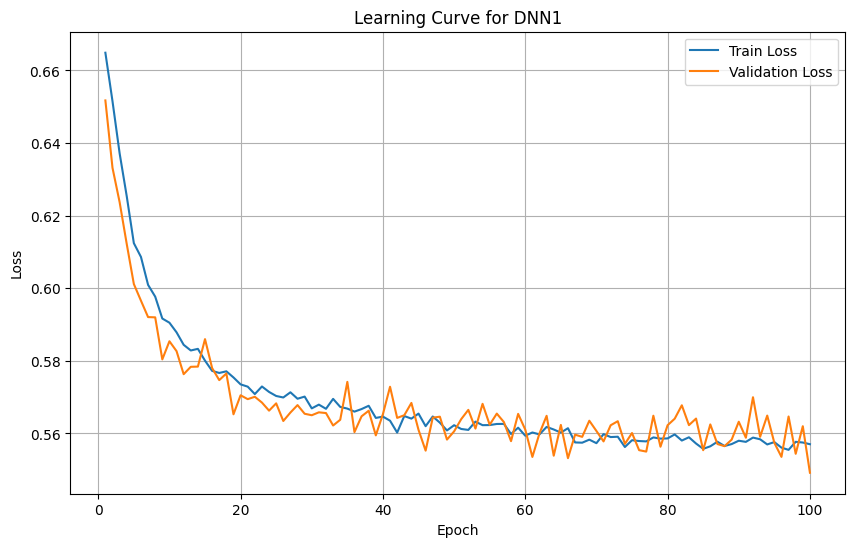

In [117]:
#DNN1の学習
num_epochs = 100

print(f"Training model: DNN1")

DNN_1.train()  
train_losses = []
val_losses = []
train_losses_per_model = []  

for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0

    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        DNN_1_optim.zero_grad()

        outputs = DNN_1(X_batch).squeeze()
        loss = criterion(outputs, y_batch)

        loss.backward()
        DNN_1_optim.step()

        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)


    if val_loader is not None:
        DNN_1.eval()  
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = DNN_1(X_val).squeeze()
                val_loss = criterion(val_outputs, y_val)
                epoch_val_loss += val_loss.item()

        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        DNN_1.train()  

    if val_loader is not None:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    else:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")


train_losses_per_model.append([train_losses])


plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
if val_losses:
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve for DNN1')
plt.legend()
plt.grid()
plt.show()

Training model: DNN2


Epoch [1/100], Train Loss: 0.6730, Val Loss: 0.6613
Epoch [2/100], Train Loss: 0.6523, Val Loss: 0.6341
Epoch [3/100], Train Loss: 0.6317, Val Loss: 0.6125
Epoch [4/100], Train Loss: 0.6197, Val Loss: 0.5983
Epoch [5/100], Train Loss: 0.6131, Val Loss: 0.5904
Epoch [6/100], Train Loss: 0.6027, Val Loss: 0.5925
Epoch [7/100], Train Loss: 0.5978, Val Loss: 0.5846
Epoch [8/100], Train Loss: 0.5916, Val Loss: 0.5932
Epoch [9/100], Train Loss: 0.5894, Val Loss: 0.5870
Epoch [10/100], Train Loss: 0.5834, Val Loss: 0.5788
Epoch [11/100], Train Loss: 0.5834, Val Loss: 0.5805
Epoch [12/100], Train Loss: 0.5800, Val Loss: 0.5779
Epoch [13/100], Train Loss: 0.5800, Val Loss: 0.5734
Epoch [14/100], Train Loss: 0.5777, Val Loss: 0.5676
Epoch [15/100], Train Loss: 0.5738, Val Loss: 0.5772
Epoch [16/100], Train Loss: 0.5729, Val Loss: 0.5699
Epoch [17/100], Train Loss: 0.5715, Val Loss: 0.5704
Epoch [18/100], Train Loss: 0.5716, Val Loss: 0.5692
Epoch [19/100], Train Loss: 0.5689, Val Loss: 0.5781
Ep

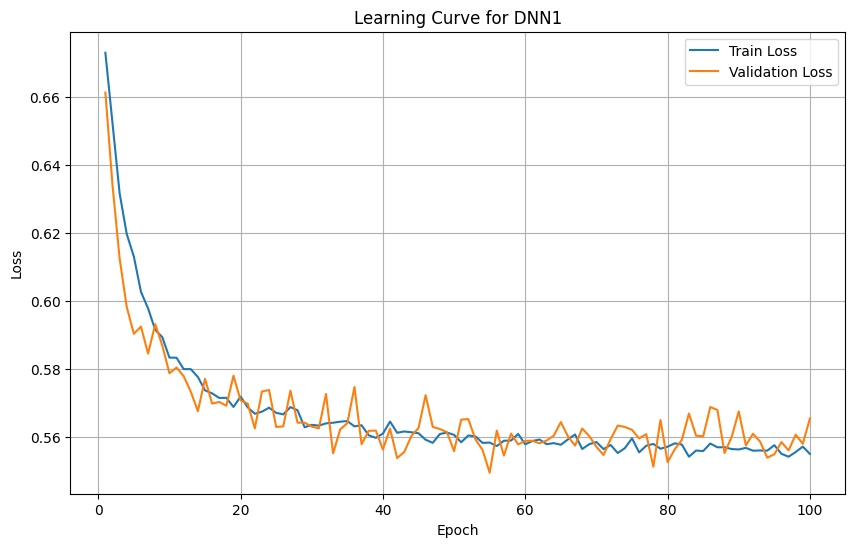

In [118]:
#DNN2の学習
num_epochs = 100

print(f"Training model: DNN2")

DNN_2.train()  
train_losses = []
val_losses = []
train_losses_per_model = []  

for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0

    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        DNN_2_optim.zero_grad()

        outputs = DNN_2(X_batch).squeeze()
        loss = criterion(outputs, y_batch)

        loss.backward()
        DNN_2_optim.step()

        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)


    if val_loader is not None:
        DNN_2.eval()  
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = DNN_2(X_val).squeeze()
                val_loss = criterion(val_outputs, y_val)
                epoch_val_loss += val_loss.item()

        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        DNN_2.train()  

    if val_loader is not None:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    else:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")


train_losses_per_model.append([train_losses])


plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
if val_losses:
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve for DNN1')
plt.legend()
plt.grid()
plt.show()

Training model: DNN1


Epoch [1/100], Train Loss: 0.6580, Val Loss: 0.6339
Epoch [2/100], Train Loss: 0.6299, Val Loss: 0.6072
Epoch [3/100], Train Loss: 0.6122, Val Loss: 0.5916
Epoch [4/100], Train Loss: 0.6020, Val Loss: 0.5896
Epoch [5/100], Train Loss: 0.5925, Val Loss: 0.5865
Epoch [6/100], Train Loss: 0.5873, Val Loss: 0.5796
Epoch [7/100], Train Loss: 0.5838, Val Loss: 0.5761
Epoch [8/100], Train Loss: 0.5813, Val Loss: 0.5736
Epoch [9/100], Train Loss: 0.5800, Val Loss: 0.5600
Epoch [10/100], Train Loss: 0.5772, Val Loss: 0.5687
Epoch [11/100], Train Loss: 0.5740, Val Loss: 0.5701
Epoch [12/100], Train Loss: 0.5715, Val Loss: 0.5611
Epoch [13/100], Train Loss: 0.5705, Val Loss: 0.5580
Epoch [14/100], Train Loss: 0.5733, Val Loss: 0.5623
Epoch [15/100], Train Loss: 0.5679, Val Loss: 0.5612
Epoch [16/100], Train Loss: 0.5667, Val Loss: 0.5596
Epoch [17/100], Train Loss: 0.5701, Val Loss: 0.5651
Epoch [18/100], Train Loss: 0.5693, Val Loss: 0.5605
Epoch [19/100], Train Loss: 0.5683, Val Loss: 0.5616
Ep

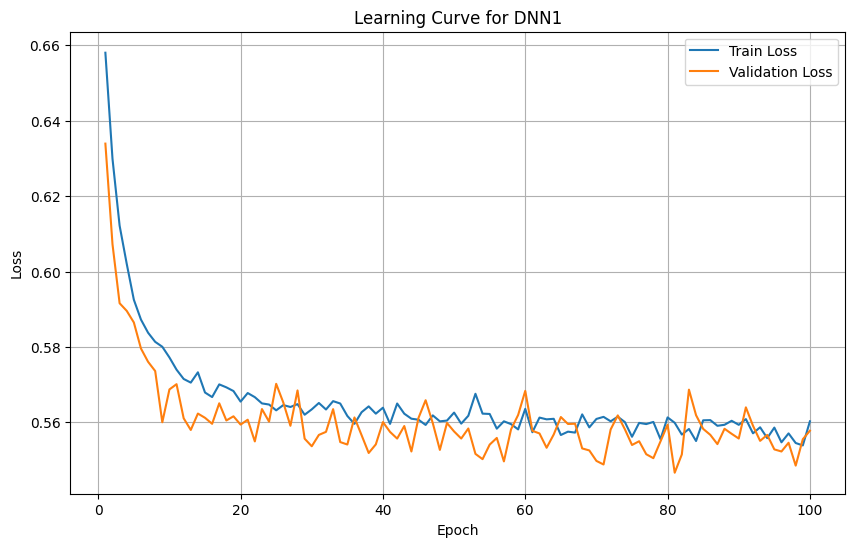

In [119]:
#DNN3の学習
num_epochs = 100

print(f"Training model: DNN1")

DNN_3.train()  
train_losses = []
val_losses = []
train_losses_per_model = []  

for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0

    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        DNN_3_optim.zero_grad()

        outputs = DNN_3(X_batch).squeeze()
        loss = criterion(outputs, y_batch)

        loss.backward()
        DNN_3_optim.step()

        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)


    if val_loader is not None:
        DNN_3.eval()  
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = DNN_3(X_val).squeeze()
                val_loss = criterion(val_outputs, y_val)
                epoch_val_loss += val_loss.item()

        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        DNN_3.train()  

    if val_loader is not None:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    else:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")


train_losses_per_model.append([train_losses])


plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
if val_losses:
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve for DNN1')
plt.legend()
plt.grid()
plt.show()


--- Evaluating Model 1 ---

Accuracy: 60.25%
Precision: 0.4855
Recall: 0.4956
F1 Score: 0.4905
Matthews Correlation Coefficient: 0.1647
Specificity: 0.6698


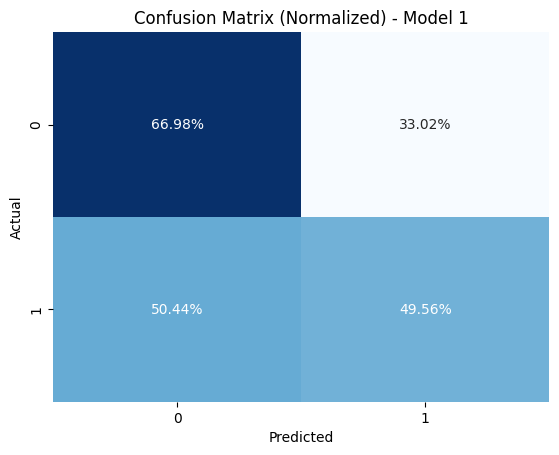

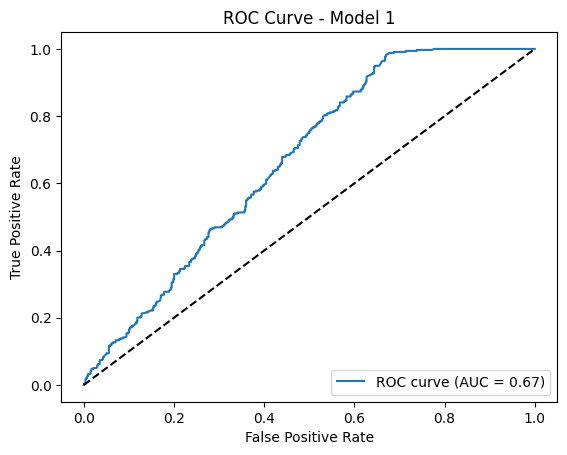

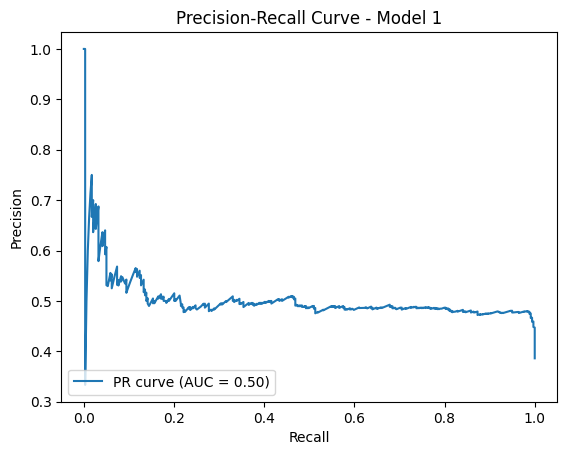


--- Evaluating Model 2 ---

Accuracy: 61.28%
Precision: 0.4987
Recall: 0.5782
F1 Score: 0.5355
Matthews Correlation Coefficient: 0.2082
Specificity: 0.6345


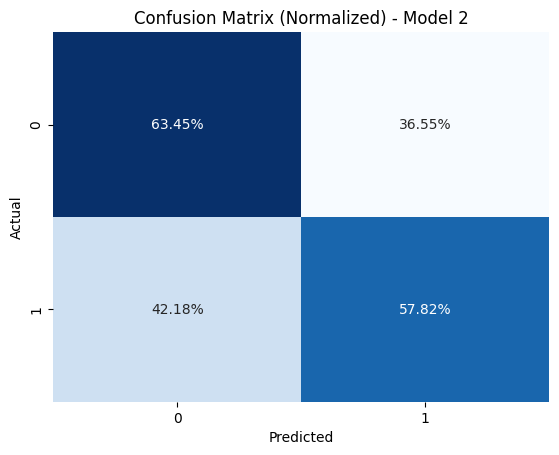

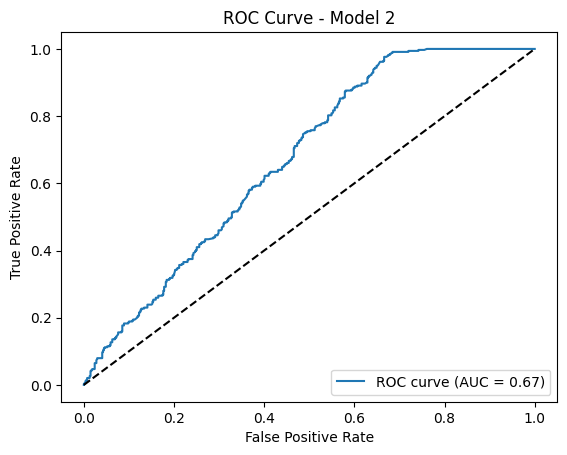

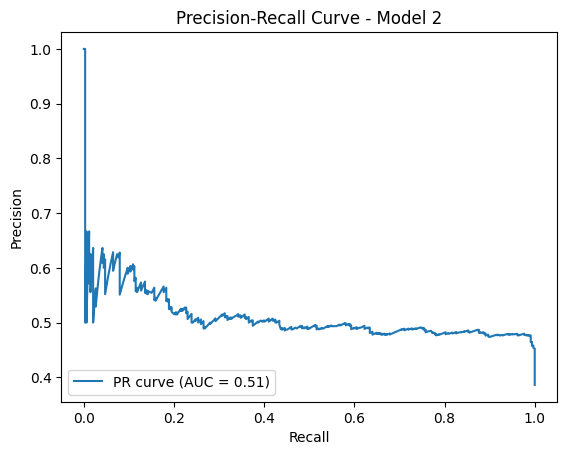


--- Evaluating Model 3 ---

Accuracy: 62.76%
Precision: 0.6071
Recall: 0.1003
F1 Score: 0.1722
Matthews Correlation Coefficient: 0.1185
Specificity: 0.9592


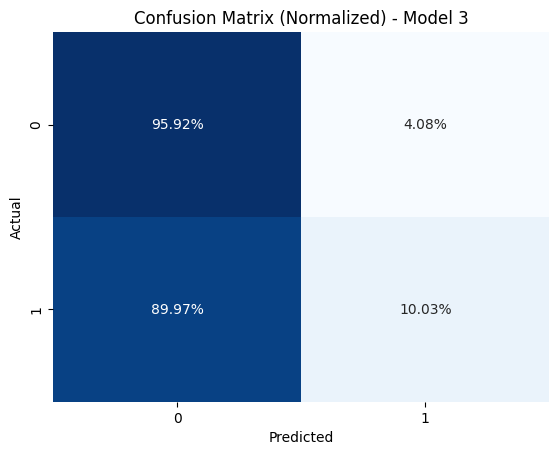

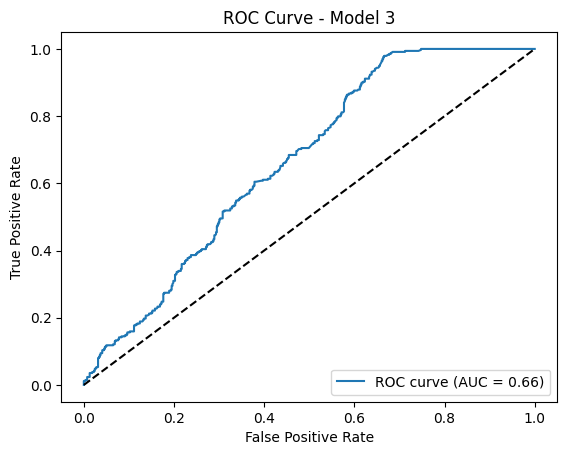

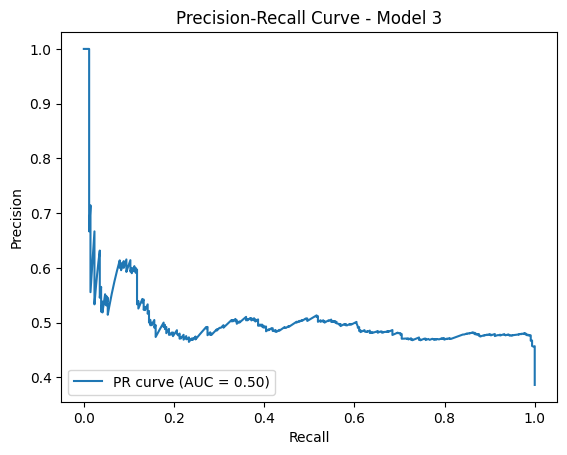

In [120]:
models=[DNN_1,DNN_2,DNN_3]

# 評価を各モデルで実施
for idx, model in enumerate(models):
    print(f"\n--- Evaluating Model {idx + 1} ---\n")
    
    model.eval()
    with torch.no_grad():
        X_test_tensor = X_test_tensor.to(device)
        y_test_tensor = y_test_tensor.to(device)

        # 予測と確率
        test_outputs = model(X_test_tensor).squeeze()
        predictions = (test_outputs >= 0.5).float()
        y_true = y_test_tensor.cpu().numpy()
        y_pred = predictions.cpu().numpy()
        y_prob = test_outputs.cpu().numpy()

        # 評価指標
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        mcc = matthews_corrcoef(y_true, y_pred)
        specificity = recall_score(y_true, y_pred, pos_label=0)  
        print(f'Accuracy: {accuracy * 100:.2f}%')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')
        print(f'F1 Score: {f1:.4f}')
        print(f'Matthews Correlation Coefficient: {mcc:.4f}')
        print(f'Specificity: {specificity:.4f}')

        # 混同行列（割合表示）
        cm = confusion_matrix(y_true, y_pred, normalize='true')
        sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix (Normalized) - Model {idx + 1}")
        plt.show()

        # ROC曲線とAUC
        fpr, tpr, thresholds = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--') 
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Model {idx + 1}')
        plt.legend(loc="lower right")
        plt.show()

        # Precision-Recall曲線
        precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_prob)
        pr_auc = auc(recall_curve, precision_curve)
        plt.plot(recall_curve, precision_curve, label=f'PR curve (AUC = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - Model {idx + 1}')
        plt.legend(loc="lower left")
        plt.show()

In [121]:
# 学習用スタッキングデータ
DNN1_preds = DNN_1(X_train_tensor.to(device)).cpu().detach().numpy().squeeze()
DNN2_preds = DNN_2(X_train_tensor.to(device)).cpu().detach().numpy().squeeze()
DNN3_preds = DNN_3(X_train_tensor.to(device)).cpu().detach().numpy().squeeze()


train_stacked_features = np.column_stack((DNN1_preds, DNN2_preds,DNN3_preds))
train_stacked_labels=y_train

# テスト用スタッキングデータ
DNN1_preds = DNN_1(X_test_tensor.to(device)).cpu().detach().numpy().squeeze()
DNN2_preds = DNN_2(X_test_tensor.to(device)).cpu().detach().numpy().squeeze()
DNN3_preds = DNN_3(X_test_tensor.to(device)).cpu().detach().numpy().squeeze()

test_stacked_features = np.column_stack((DNN1_preds, DNN2_preds, DNN3_preds))
test_stacked_labels=y_test




In [122]:
meta_model=SVC(kernel='rbf',probability=True)
meta_model.fit(train_stacked_features,train_stacked_labels)

SVC(probability=True)

Accuracy: 61.16%
Precision: 0.4965
Recall: 0.4189
F1 Score: 0.4544
Matthews Correlation Coefficient: 0.1576
Specificity: 0.7328
AUC Score: 0.6542


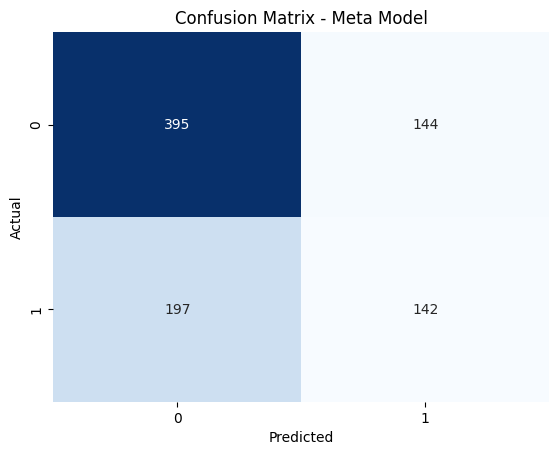

In [123]:
# メタモデルの評価
stack_val_preds = meta_model.predict_proba(test_stacked_features)[:, 1]
stack_val_predictions = (stack_val_preds > 0.45).astype(int)

# 評価指標の計算
accuracy = accuracy_score(test_stacked_labels, stack_val_predictions)
precision = precision_score(test_stacked_labels, stack_val_predictions)
recall = recall_score(test_stacked_labels, stack_val_predictions)
f1 = f1_score(test_stacked_labels, stack_val_predictions)
mcc = matthews_corrcoef(test_stacked_labels, stack_val_predictions)
specificity = recall_score(test_stacked_labels, stack_val_predictions, pos_label=0)
auc_score = roc_auc_score(test_stacked_labels, stack_val_preds)

# 結果を出力
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Matthews Correlation Coefficient: {mcc:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f"AUC Score: {auc_score:.4f}")

# スタッキングモデルの混同行列表示
stack_cm = confusion_matrix(test_stacked_labels, stack_val_predictions)
sns.heatmap(stack_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Meta Model")
plt.show()
